In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv') #Lettura dataset

In [2]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data) #Convert csv file into a matrix
m, n = data.shape #Dimensions of the matrix
np.random.shuffle(data) # shuffle before splitting into dev and training sets

In [4]:
#Dev data
data_dev = np.transpose(data[0:1000]) #First 1000 elements transposed
Y_dev = data_dev[0] #Array with the 1000 labels
X_dev = data_dev[1:n]
X_dev = X_dev / 255. #All values divided by 255

In [5]:
#Training data
data_train = data[1000:m].T #First 1000 elements transposed
Y_train = data_train[0] #Array with the 1000 training labels
X_train = data_train[1:n]
X_train = X_train / 255. #All values divided by 255
_,m_train = X_train.shape #m_train represents the number of training sessions

In [6]:
#Initialization of the parameters. The values are around zero, in a range [-0.5,0.5]
#The function random.rand() returns a matrix n x m with values from 0 to 1
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [7]:
def ReLU(Z):
    return np.maximum(Z, 0)

def derivative_ReLU(Z):
    return Z > 0

In [8]:
def forward_propagation(W1,b1,W2,b2,X):
    #All operations are made in matrix format
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    return Z1, A1, Z2, A2

In [9]:
#Sets the label in a zeros array with the label index setted to 1
#Ex: if the result is 5 => [0,0,0,0,0,1,0,0,0,0], one_hot creates the full matrix 
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

#Example of what one_hot does
#Y = one_hot(Y_train)
#print(Y_train[i])
#print(Y[:,i])

In [10]:
#Backpropagation
def backward_propagation(W2,Y,A1,A2,X, Z2, Z1):
    one_hot_Y = one_hot(Y)
    dZ2 = np.multiply((A2 - one_hot_Y),derivative_ReLU(Z2))#derivative of 0.5 * (A2-Y)^2
    #Performs better without derivative, even if it would be correct to use it, 87,7% vs crc 50%
    #dZ2 = (A2 - one_hot_Y)
    # 1 / len(Y) because of the mole of training 
    dW2 = 1 / len(Y) * dZ2.dot(A1.T)
    db2 = 1 / len(Y) * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
    dW1 = 1 / len(Y) * dZ1.dot(X.T)
    db1 = 1 / len(Y) * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [11]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [12]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(W2, Y, A1, A2, X, Z2, Z1)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [13]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 5000)

Iteration:  0
[7 3 7 ... 3 7 7] [9 3 4 ... 0 9 1]
0.1426341463414634
Iteration:  10
[0 0 0 ... 0 0 7] [9 3 4 ... 0 9 1]
0.09517073170731707
Iteration:  20
[0 0 0 ... 0 0 7] [9 3 4 ... 0 9 1]
0.09592682926829268
Iteration:  30
[0 0 0 ... 0 0 7] [9 3 4 ... 0 9 1]
0.09675609756097561
Iteration:  40
[0 0 0 ... 0 0 7] [9 3 4 ... 0 9 1]
0.09758536585365854
Iteration:  50
[0 0 0 ... 0 0 7] [9 3 4 ... 0 9 1]
0.09780487804878049
Iteration:  60
[0 0 0 ... 0 0 7] [9 3 4 ... 0 9 1]
0.098
Iteration:  70
[0 0 0 ... 0 0 0] [9 3 4 ... 0 9 1]
0.09836585365853659
Iteration:  80
[0 0 0 ... 0 0 0] [9 3 4 ... 0 9 1]
0.09841463414634147
Iteration:  90
[0 0 0 ... 0 0 0] [9 3 4 ... 0 9 1]
0.09858536585365854
Iteration:  100
[0 0 0 ... 0 0 0] [9 3 4 ... 0 9 1]
0.09873170731707318
Iteration:  110
[0 0 0 ... 0 0 0] [9 3 4 ... 0 9 1]
0.09875609756097561
Iteration:  120
[0 0 0 ... 0 0 0] [9 3 4 ... 0 9 1]
0.099
Iteration:  130
[0 0 0 ... 0 0 0] [9 3 4 ... 0 9 1]
0.09907317073170732
Iteration:  140
[0 0 0 ... 0 0 0

In [14]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [15]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_dev[:, index, None]
    prediction = make_predictions(X_dev[:, index, None], W1, b1, W2, b2)
    label = Y_dev[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [16]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 3 8 8 8 0 8 3 8 0 7 7 7 7 7 8 0 7 0 8 8 7 3 3 3 7 0 3 7 8 7 7 8 8 0 8 7
 0 7 8 3 0 3 0 8 7 7 7 7 7 8 3 7 8 8 7 7 7 7 7 8 7 0 7 8 7 7 7 0 7 0 7 8 7
 0 8 8 7 0 7 0 3 0 3 0 3 3 8 0 3 7 7 7 0 8 7 8 0 3 7 7 7 7 7 7 8 3 8 3 3 7
 7 3 7 7 8 7 8 7 7 7 7 7 8 7 0 0 7 7 0 7 7 7 8 8 7 3 7 7 7 7 7 7 3 7 7 8 8
 7 8 7 7 7 3 7 7 7 7 7 0 8 7 7 8 3 3 8 8 8 0 0 7 3 7 8 3 0 7 3 7 0 7 0 8 7
 3 0 0 7 8 0 3 7 0 7 3 7 3 7 7 7 7 7 7 8 8 7 7 3 7 7 0 3 7 8 7 3 7 3 0 7 8
 0 3 7 8 7 3 3 7 3 7 0 7 7 3 7 7 7 8 7 7 0 7 8 0 8 0 8 7 7 7 7 7 8 7 3 7 7
 7 7 8 3 0 0 7 8 7 7 8 3 7 7 8 8 3 7 0 0 7 8 3 7 7 7 7 3 7 8 0 7 0 7 7 8 8
 3 0 3 3 7 7 7 7 7 3 8 0 3 0 3 7 8 3 8 7 0 7 0 3 7 8 8 8 3 7 7 3 8 3 0 7 7
 0 7 7 8 7 3 7 8 3 0 8 7 8 0 3 8 3 7 7 0 7 7 8 0 3 0 0 3 7 7 3 0 0 7 7 8 0
 8 0 8 8 8 7 8 7 8 7 7 7 0 0 7 7 8 8 8 3 7 7 0 0 7 0 7 8 7 7 7 7 7 7 0 8 8
 3 8 7 7 7 8 0 3 7 3 3 8 0 8 0 0 7 7 3 0 3 7 8 3 7 3 3 3 7 8 7 3 3 3 7 7 3
 3 0 7 7 7 7 7 7 0 8 7 0 0 8 7 3 3 8 7 7 0 7 7 3 7 8 7 7 7 7 0 7 8 7 0 8 8
 7 3 7 3 3 7 7 8 3 8 8 8 

0.328

Prediction:  [3]
Label:  8


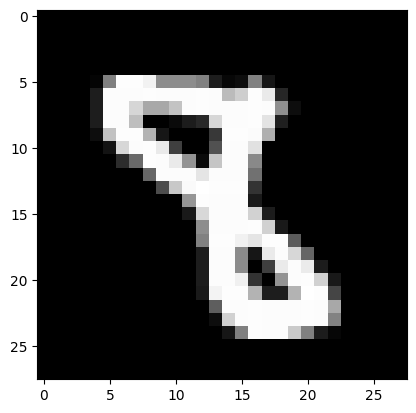

In [17]:
test_prediction(7,W1,b1,W2,b2)

In [18]:
A = np.matrix([[3,4]])
B = np.matrix([[2,2]])

print(B*A.T)
#print(np.dot(A,B))

# Define two vectors for the dot product
vector_a = np.array([2, 3, 4]) 
vector_b = np.array([1, 5, 6]) 

# Calculate the dot product
dot_result = np.dot(vector_a, vector_b)

print(f"Dot Product: {dot_result}")

[[14]]
Dot Product: 41
